# Los Angeles County cities, neighborhoods and unincorportated areas

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt

/Users/stiles/.local/share/virtualenvs/notebooks-sxqKeO4C/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [4]:
today = pd.to_datetime("today").strftime("%Y-%m-%d")

---

## Los Angeles County

#### Read LA Times' defined boundaries for cites and unincorporated areas

In [5]:
la_county = gpd.read_file("data/raw/latimes_neighborhoods/neighborhoods.shp")

In [6]:
la_county.columns = la_county.columns.str.lower()

#### LA County contains the San Fernando Valley, which is mostly neighborhoods in the City of Los Angeles

<AxesSubplot:>

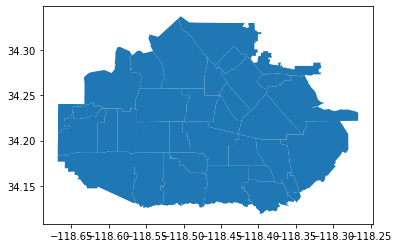

In [20]:
la_county[la_county["region"] == "san-fernando-valley"].plot()

#### Other names familiar to outsiders — East LA, for example — are distinct places in the county but inside actual cities

In [25]:
la_county[la_county["name"].str.contains("East Los Angeles")]

,name,slug,county,type,city,region,geometry
39,East Los Angeles,east-los-angeles,los-angeles,unincorporated-area,None,eastside,"POLYGON ((-118.17689 34.06228, -118.17663 34.0..."


<AxesSubplot:>

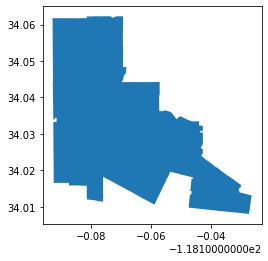

In [26]:
la_county[la_county["name"].str.contains("East Los Angeles")].plot()

#### Others are in fact cities, some of which are contained within the City of Los Angeles. Take Beverly Hills, for example

In [29]:
la_county[la_county["name"].str.contains("Beverly Hills")]

,name,slug,county,type,city,region,geometry
16,Beverly Hills,beverly-hills,los-angeles,standalone-city,None,westside,"POLYGON ((-118.39114 34.11242, -118.39064 34.1..."


<AxesSubplot:>

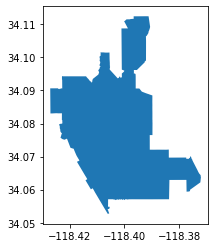

In [30]:
la_county[la_county["name"].str.contains("Beverly Hills")].plot()

---

## City of Los Angeles

#### Los Angeles is the largest city in LA County. The LA Times has defined it's neighborhoods, too. 

In [31]:
la_city_hoods = gpd.read_file("data/raw/LA_Times_Neighborhood_Boundaries.geojson")

<AxesSubplot:>

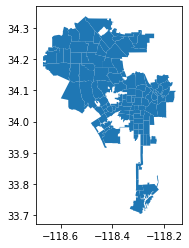

In [32]:
la_city_hoods.plot()

#### I live in Del Rey, which is in the City of Los Angeles

In [11]:
la_city_hoods[la_city_hoods["name"] == "Del Rey"]

<AxesSubplot:>

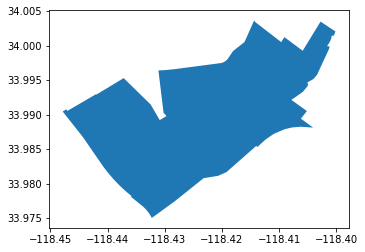

In [34]:
la_city_hoods[la_city_hoods["name"] == "Del Rey"].plot()

#### It's part of the "Westside" — a collection of cities and neighbohoods closer to the beach

<AxesSubplot:>

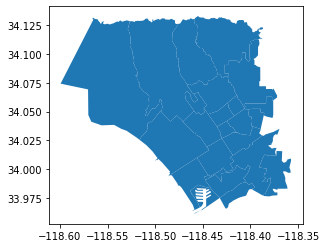

In [33]:
la_county[la_county["region"] == "westside"].plot()

#### That's not the same as Marina del Rey, an unincorporated area in LA County across Lincoln Boulevard

In [35]:
# Sorry, Playa
del_reys = ["Marina del Rey", "Del Rey"]

In [36]:
la_county[la_county["name"].isin(del_reys)]

,name,slug,county,type,city,region,geometry
234,Del Rey,del-rey,los-angeles,segment-of-a-city,los-angeles,westside,"POLYGON ((-118.41164 34.00177, -118.40964 34.0..."
310,Marina del Rey,marina-del-rey,los-angeles,unincorporated-area,None,westside,"POLYGON ((-118.44251 33.98356, -118.44179 33.9..."


<AxesSubplot:>

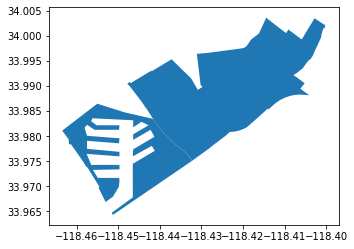

In [37]:
la_county[la_county["name"].isin(del_reys)].plot()